# Exploratory Data Analysis:  Colombian Soccer League 

Data analysis is all about answering questions with data. This Exploratory data analysis focuses on showcasing the historical performance of the two main teams in Colombian soccer, Millonarios FC and Atlético National.

Through this data analysis, I want to answer the following question: How have the win percentages for the 2 major Colombian soccer teams change over the last forty years? also graphically represent how these teams have performed in this period of time.

## 1. Region and Domain
Bogotá, Colombia
Medellin, Colombia
Sports and Athletics (Soccer League)
## 2. Research Question
- How have the win percentages for the 2 major Colombian soccer teams (Millonarios FC & Atletico Nacional) change over the last forty years?
0
- 
## 4. Image

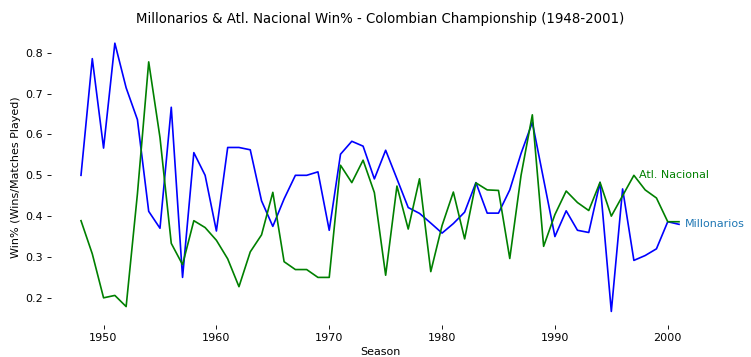
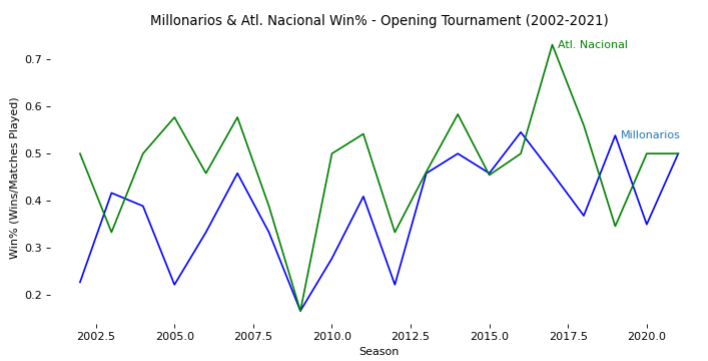
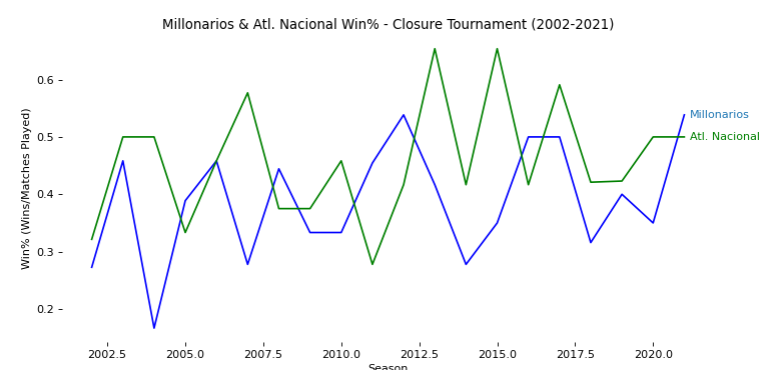

## 5. Discussion

This visualization was concerned with answering the question of How have the win percentages for the 2 major Colombian soccer teams 
(Millonarios FC & Atletico Nacional) change over the last forty years. 
Wikipedia was scraped for data concerning team performance by season for each team. 
A 10 year moving average was plotted to help the reader identify
any major trends in the team’s win percentages.7

The league has gone through several tournament formats
one where the league was played in one calendar year (Colombian Championship 1948-2001)
and another where two tournaments are played per year, one opening and one finishing (Opening / Closure Tournament 2002-2021) 

The first plot indicates years of high win percentage for Millionarios FC around 1948 and 1960,
with periods of decline following with a downward trend since the new tournament format but since 2020 the winning percentage has increase.
Atletico Nacional win percentage shows an increase in the mid 50'and at the end of the 80's with a upward trend since the new tournament format.

## Data Manipulation

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib widget
'Loading...'

'Loading...'

In [212]:
#DF Millionarios FC
df_mil=pd.read_csv('historico_millonarios_fc.csv').dropna()
print(df_mil.head(5))
print(df_mil.tail(5))
print(df_mil.size)

                       Torneo          Posición    PJ    PG   PE   PP     GF  \
0  Campeonato colombiano 1948                4º  18.0   9.0  1.0  8.0   58.0   
1  Campeonato colombiano 1949  CampeónStar*.svg  28.0  22.0  4.0  2.0  103.0   
2  Campeonato colombiano 1950        Subcampeón  30.0  17.0  9.0  4.0   68.0   
3  Campeonato colombiano 1951  CampeónStar*.svg  34.0  28.0  4.0  2.0   98.0   
4  Campeonato colombiano 1952  CampeónStar*.svg  28.0  20.0  6.0  2.0   70.0   

     GC   DIF  
0  45.0  13.0  
1  37.0  66.0  
2  41.0  27.0  
3  29.0  69.0  
4  13.0  57.0  
                        Torneo    Posición    PJ    PG   PE   PP    GF    GC  \
88        Torneo Apertura 2019          3º  26.0  14.0  8.0  4.0  37.0  20.0   
89    Torneo Finalización 2019         11º  20.0   8.0  4.0  8.0  24.0  27.0   
90  Campeonato colombiano 2020         10º  20.0   7.0  9.0  4.0  29.0  21.0   
91        Torneo Apertura 2021  Subcampeón  24.0  12.0  5.0  7.0  33.0  25.0   
92    Torneo Finalizaci

In [213]:
#DF Atletico Nacional
df_atl=pd.read_csv('historico_atl_nacional.csv').dropna()
print(df_atl.head(5))
print(df_atl.tail(5))
print(df_mil.size)

                       Torneo Posición  PJ  PG  PE  PP  GF  GC  DIF  Pts. Bono
0  Campeonato colombiano 1948       6º  18   7   4   7  29  36   -7    18    0
1  Campeonato colombiano 1949       7º  26   8   8  10  40  60  -20    24    0
2  Campeonato colombiano 1950      15º  30   6   4  20  55  79  -24    16    0
3  Campeonato colombiano 1951      15º  34   7   9  18  54  96  -42    23    0
4  Campeonato colombiano 1952      13º  28   5   7  16  38  68  -30    17    0
                        Torneo Posición  PJ  PG  PE  PP  GF  GC  DIF  Pts.  \
88        Torneo Apertura 2019       7°  26   9   8   9  30  29    1    35   
89    Torneo Finalización 2019       3°  26  11  10   5  37  24   13    43   
90  Campeonato Colombiano 2020       4°  22  11   5   6  41  35    6    38   
91        Torneo Apertura 2021       5°  20  10   5   5  39  18   21    35   
92    Torneo Finalización 2021       5°  26  13   9   4  42  22   20    48   

   Bono  
88    0  
89    0  
90    0  
91    0  
92    0

In [214]:
# Keep columns with matchs data
columns_to_keep=['Torneo','Posición','PJ','PG','PE','PP']
df_mil=df_mil[columns_to_keep]
df_atl=df_atl[columns_to_keep]
df_mil.head()

,Torneo,Posición,PJ,PG,PE,PP
0,Campeonato colombiano 1948,4º,18.0,9.0,1.0,8.0
1,Campeonato colombiano 1949,CampeónStar*.svg,28.0,22.0,4.0,2.0
2,Campeonato colombiano 1950,Subcampeón,30.0,17.0,9.0,4.0
3,Campeonato colombiano 1951,CampeónStar*.svg,34.0,28.0,4.0,2.0
4,Campeonato colombiano 1952,CampeónStar*.svg,28.0,20.0,6.0,2.0


In [215]:
#df_mil['season']=df_mil["Torneo"].str[-4:].astype(int)
#Throws a an error beacuase some row doesnt have the expected integer at the end of it
# Row 48 and 49

In [216]:
df_mil[(df_mil["Torneo"]=='Campeonato colombiano 1995/96')|(df_mil["Torneo"]=='Campeonato colombiano 1996/97')]

,Torneo,Posición,PJ,PG,PE,PP
48,Campeonato colombiano 1995/96,Subcampeón,60.0,28.0,10.0,22.0
49,Campeonato colombiano 1996/97,4º,72.0,21.0,20.0,30.0


In [217]:
# Change the Values to the correct year
df_mil.at[48,'Torneo'] = 'Campeonato colombiano 1996'
df_mil.at[49,'Torneo'] = 'Campeonato colombiano 1997'
df_atl.at[48,'Torneo'] = 'Campeonato colombiano 1996'
df_atl.at[49,'Torneo'] = 'Campeonato colombiano 1997'
# Now we create the season column
df_mil['season']=df_mil["Torneo"].str[-4:].astype(int)
df_atl['season']=df_atl["Torneo"].str[-4:].astype(int)

In [218]:
# Tournament Format
#Extract Regex
def split_it(cat):
    A='[a-zA-Z]+\s[a-zA-Z]+ón'
    B='[a-zA-Z]+.*[a-zA-Z]+'
    if cat[-2] =='ó':
        sol=A
    else:
        sol=B
    return re.findall(sol, cat)    
df_mil['Torneo']=df_mil['Torneo'].apply(lambda x: split_it(x))
df_atl['Torneo']=df_atl['Torneo'].apply(lambda x: split_it(x))

# Convert Regex list to String
def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += ele   
    return str1 
df_mil['Torneo']=df_mil['Torneo'].apply(lambda x: listToString(x).lower())
df_atl['Torneo']=df_atl['Torneo'].apply(lambda x: listToString(x).lower())

In [219]:
# Rename Columns
df_mil.rename(columns = {'Torneo':'tournament',
                         'Posición':'position',
                         'PJ':'matches_played',
                         'PG':'wins',
                         'PE':'draws',
                         'PP':'lost'}, inplace = True)
df_atl.rename(columns = {'Torneo':'tournament',
                         'Posición':'position', 
                         'PJ':'matches_played',
                         'PG':'wins','PE':'draws',
                         'PP':'lost'}, inplace = True)

In [220]:
df_mil['tournament']=pd.Categorical(df_mil['tournament'].apply(str))
df_atl['tournament']=pd.Categorical(df_atl['tournament'].apply(str))
df_mil.dtypes

tournament        category
position            object
matches_played     float64
wins               float64
draws              float64
lost               float64
season               int32
dtype: object

In [221]:
#df_mil=df_mil.set_index('tournament').sort_index()
#df_atl=df_atl.set_index('tournament').sort_index()

In [222]:
# Win Percentage
df_mil['win%']=(df_mil['wins']/df_mil['matches_played'])
df_atl['win%']=(df_atl['wins']/df_atl['matches_played'])

In [223]:
df_mil_camp = df_mil[(df_mil['tournament'] == 'campeonato colombiano')&~(df_mil['season'] == 2020)]
df_mil_apt  = df_mil[(df_mil['tournament'] == 'torneo apertura')|(df_mil['season'] == 2020)]
df_mil_clo  = df_mil[(df_mil['tournament'] == 'torneo finalización')|(df_mil['season'] == 2020)]
df_atl_camp = df_atl[(df_atl['tournament'] == 'campeonato colombiano')&~(df_atl['season'] == 2020)]
df_atl_apt  = df_atl[(df_atl['tournament'] == 'torneo apertura')|(df_atl['season'] == 2020)]
df_atl_clo  = df_atl[(df_atl['tournament'] == 'torneo finalización')|(df_atl['season'] == 2020)]

In [246]:
df_mil_tou=df_mil[(df_mil['tournament'] !='campeonato colombiano')|(df_mil['season'] == 2020)]
df_atl_tou=df_atl[(df_atl['tournament'] !='campeonato colombiano')|(df_atl['season'] == 2020)]

## Plotting

Text(5, 0, 'Atl. Nacional')

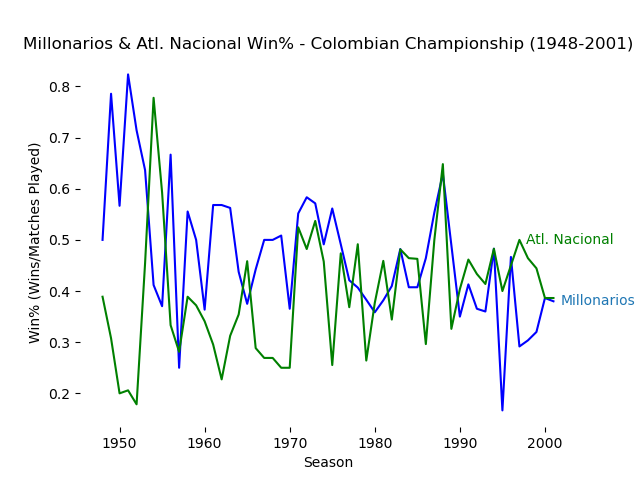

In [238]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.figure()
plt.gca()
#Labels
plt.xlabel('Season')
plt.ylabel('Win% (Wins/Matches Played)')
plt.title('Millonarios & Atl. Nacional Win% - Colombian Championship (1948-2001)')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#Plot
plt.plot(tuple(df_mil_camp['season']),tuple(df_mil_camp['win%']),color='b')
#def improve(ax,name):   
plt.gca()
plt.annotate(
            'Millonarios',
            xy=(df_mil_camp['season'].iloc[-1],df_mil_camp['win%'].iloc[-1]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color=line.get_color(),
        )
plt.plot(tuple(df_atl_camp['season']),tuple(df_atl_camp['win%']),color='g')
plt.annotate(
            'Atl. Nacional',
            xy=(df_atl_camp['season'].iloc[-5],df_atl_camp['win%'].iloc[-5]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color='g',
        )

Text(5, 0, 'Atl. Nacional')

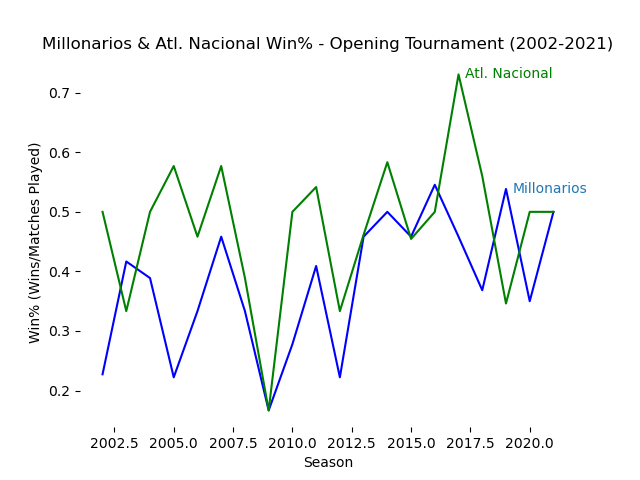

In [239]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.figure()
plt.gca()
#Labels
plt.xlabel('Season')
plt.ylabel('Win% (Wins/Matches Played)')
plt.title('Millonarios & Atl. Nacional Win% - Opening Tournament (2002-2021)')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#Plot
plt.plot(tuple(df_mil_apt['season']),tuple(df_mil_apt['win%']),color='b')
#def improve(ax,name):   
plt.gca()
plt.annotate(
            'Millonarios',
            xy=(df_mil_apt['season'].iloc[-3],df_mil_apt['win%'].iloc[-3]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color=line.get_color(),
        )
plt.plot(tuple(df_atl_apt['season']),tuple(df_atl_apt['win%']),color='g')
plt.annotate(
            'Atl. Nacional',
            xy=(df_atl_apt['season'].iloc[-5],df_atl_apt['win%'].iloc[-5]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color='g',
        )

Text(5, 0, 'Atl. Nacional')

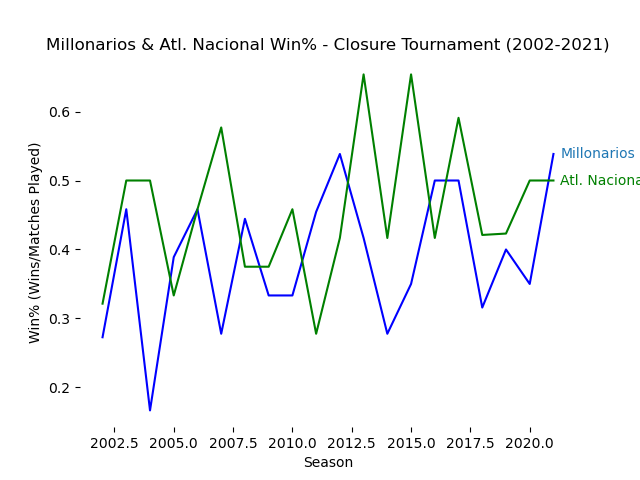

In [240]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.figure()
plt.gca()
#Labels
plt.xlabel('Season')
plt.ylabel('Win% (Wins/Matches Played)')
plt.title('Millonarios & Atl. Nacional Win% - Closure Tournament (2002-2021)')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#Plot
plt.plot(tuple(df_mil_clo['season']),tuple(df_mil_clo['win%']),color='b')
#def improve(ax,name):   
plt.gca()
plt.annotate(
            'Millonarios',
            xy=(df_mil_clo['season'].iloc[-1],df_mil_clo['win%'].iloc[-1]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color=line.get_color(),
        )
plt.plot(tuple(df_atl_clo['season']),tuple(df_atl_clo['win%']),color='g')
plt.annotate(
            'Atl. Nacional',
            xy=(df_atl_clo['season'].iloc[-1],df_atl_clo['win%'].iloc[-1]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color='g',
        )

Text(5, 0, 'Atl. Nacional')

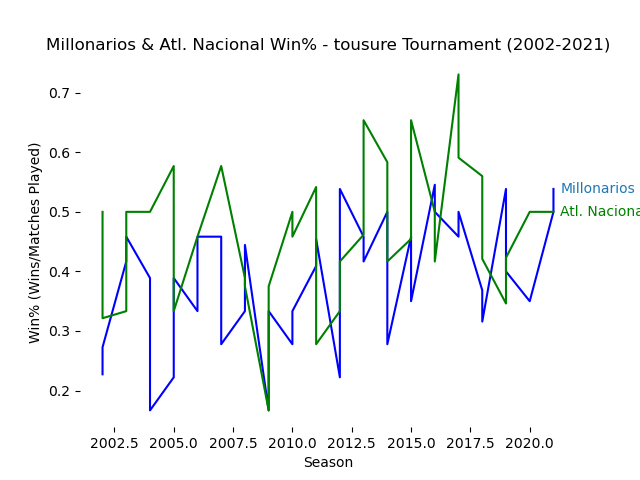

In [247]:
plt.figure()
plt.gca()
#Labels
plt.xlabel('Season')
plt.ylabel('Win% (Wins/Matches Played)')
plt.title('Millonarios & Atl. Nacional Win% - tousure Tournament (2002-2021)')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#Plot
plt.plot(tuple(df_mil_tou['season']),tuple(df_mil_tou['win%']),color='b')
#def improve(ax,name):   
plt.gca()
plt.annotate(
            'Millonarios',
            xy=(df_mil_tou['season'].iloc[-1],df_mil_tou['win%'].iloc[-1]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color=line.get_color(),
        )
plt.plot(tuple(df_atl_tou['season']),tuple(df_atl_tou['win%']),color='g')
plt.annotate(
            'Atl. Nacional',
            xy=(df_atl_tou['season'].iloc[-1],df_atl_tou['win%'].iloc[-1]),
            xytext=(5, 0),
            textcoords="offset points",
            va="center",
            color='g',
        )